In [39]:
import pandas as pd
import plotly.express as px
import numpy as np

In [2]:
df = pd.read_csv('inclusive_features_usage.csv')
df

,user_id,feature_used,session_duration,engagement_score,accessibility_settings,age_group,gender,additional_attributes
0,user_4737,Multilingual,60.77,4,4,Teenager,NaN,LGBTQ+
1,user_1492,Text-to-Speech,20.20,5,4,Professional,Non-Binary,NaN
2,user_5936,Colorblind Mode,93.78,2,2,Adult,Female,NaN
3,user_5519,Colorblind Mode,26.36,3,1,Adult,NaN,LGBTQ+
4,user_1853,High Contrast Mode,91.67,5,1,Young Adult,Male,NaN
...,...,...,...,...,...,...,...,...
9995,user_667,Visual Aid,110.11,1,5,Adult,Non-Binary,NaN
9996,user_3554,Visual Aid,22.44,3,2,Professional,Male,NaN
9997,user_8892,Multilingual,12.91,4,2,Senior,Non-Binary,NaN
9998,user_8014,Multilingual,19.23,3,1,Professional,NaN,LGBTQ+


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 10000 non-null  object 
 1   feature_used            10000 non-null  object 
 2   session_duration        10000 non-null  float64
 3   engagement_score        10000 non-null  int64  
 4   accessibility_settings  10000 non-null  int64  
 5   age_group               10000 non-null  object 
 6   gender                  6003 non-null   object 
 7   additional_attributes   3997 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 625.1+ KB


In [3]:
df.describe()

,session_duration,engagement_score,accessibility_settings
count,10000.000000,10000.00000,10000.000000
mean,62.443799,3.04360,2.489600
std,33.522672,1.41778,1.707332
min,5.010000,1.00000,0.000000
25%,33.070000,2.00000,1.000000
50%,63.175000,3.00000,2.000000
75%,91.600000,4.00000,4.000000
max,120.000000,5.00000,5.000000


In [4]:
df.isnull().sum()

user_id                      0
feature_used                 0
session_duration             0
engagement_score             0
accessibility_settings       0
age_group                    0
gender                    3997
additional_attributes     6003
dtype: int64

In [6]:
df['additional_attributes'].value_counts()

additional_attributes
Person of Color    2018
LGBTQ+             1979
Name: count, dtype: int64

In [7]:
df['gender'].value_counts()

gender
Male          2029
Female        1990
Non-Binary    1984
Name: count, dtype: int64

In [8]:
df['user_id'].duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996     True
9997     True
9998     True
9999    False
Name: user_id, Length: 10000, dtype: bool

In [10]:
df['user_id'].duplicated().sum()

3642

In [11]:
df['user_id'].duplicated().count()

10000

In [9]:
df[df['user_id'].duplicated()]

,user_id,feature_used,session_duration,engagement_score,accessibility_settings,age_group,gender,additional_attributes
181,user_8797,Colorblind Mode,49.41,2,0,Senior,Male,NaN
209,user_3340,Multilingual,61.51,5,3,Teenager,Male,NaN
222,user_5663,Multilingual,59.78,4,2,Professional,Non-Binary,NaN
258,user_8244,Colorblind Mode,61.77,2,0,Senior,Non-Binary,NaN
278,user_9313,Multilingual,44.49,1,4,Professional,Male,NaN
...,...,...,...,...,...,...,...,...
9993,user_2038,Colorblind Mode,90.86,1,4,Senior,NaN,Person of Color
9994,user_1926,High Contrast Mode,58.86,3,3,Teenager,Female,NaN
9996,user_3554,Visual Aid,22.44,3,2,Professional,Male,NaN
9997,user_8892,Multilingual,12.91,4,2,Senior,Non-Binary,NaN


In [13]:
new_df = df.drop_duplicates(subset=['user_id'])
new_df

,user_id,feature_used,session_duration,engagement_score,accessibility_settings,age_group,gender,additional_attributes
0,user_4737,Multilingual,60.77,4,4,Teenager,NaN,LGBTQ+
1,user_1492,Text-to-Speech,20.20,5,4,Professional,Non-Binary,NaN
2,user_5936,Colorblind Mode,93.78,2,2,Adult,Female,NaN
3,user_5519,Colorblind Mode,26.36,3,1,Adult,NaN,LGBTQ+
4,user_1853,High Contrast Mode,91.67,5,1,Young Adult,Male,NaN
...,...,...,...,...,...,...,...,...
9987,user_3468,High Contrast Mode,84.16,3,3,Senior,Male,NaN
9988,user_1210,Visual Aid,6.56,4,2,Teenager,NaN,Person of Color
9992,user_9099,Text-to-Speech,93.93,4,5,Professional,NaN,LGBTQ+
9995,user_667,Visual Aid,110.11,1,5,Adult,Non-Binary,NaN


In [14]:
new_df.isnull().sum()

user_id                      0
feature_used                 0
session_duration             0
engagement_score             0
accessibility_settings       0
age_group                    0
gender                    2567
additional_attributes     3791
dtype: int64

In [16]:
new_df['gender'].value_counts()

gender
Male          1300
Female        1246
Non-Binary    1245
Name: count, dtype: int64

In [17]:
non_bi = new_df.fillna({'gender': 'Non-Binary'})
non_bi

,user_id,feature_used,session_duration,engagement_score,accessibility_settings,age_group,gender,additional_attributes
0,user_4737,Multilingual,60.77,4,4,Teenager,Non-Binary,LGBTQ+
1,user_1492,Text-to-Speech,20.20,5,4,Professional,Non-Binary,NaN
2,user_5936,Colorblind Mode,93.78,2,2,Adult,Female,NaN
3,user_5519,Colorblind Mode,26.36,3,1,Adult,Non-Binary,LGBTQ+
4,user_1853,High Contrast Mode,91.67,5,1,Young Adult,Male,NaN
...,...,...,...,...,...,...,...,...
9987,user_3468,High Contrast Mode,84.16,3,3,Senior,Male,NaN
9988,user_1210,Visual Aid,6.56,4,2,Teenager,Non-Binary,Person of Color
9992,user_9099,Text-to-Speech,93.93,4,5,Professional,Non-Binary,LGBTQ+
9995,user_667,Visual Aid,110.11,1,5,Adult,Non-Binary,NaN


In [18]:
non_bi.isnull().sum()

user_id                      0
feature_used                 0
session_duration             0
engagement_score             0
accessibility_settings       0
age_group                    0
gender                       0
additional_attributes     3791
dtype: int64

In [19]:
non_bi2 = new_df.fillna({'additional_attributes': 'Straight'})
non_bi2

,user_id,feature_used,session_duration,engagement_score,accessibility_settings,age_group,gender,additional_attributes
0,user_4737,Multilingual,60.77,4,4,Teenager,NaN,LGBTQ+
1,user_1492,Text-to-Speech,20.20,5,4,Professional,Non-Binary,Straight
2,user_5936,Colorblind Mode,93.78,2,2,Adult,Female,Straight
3,user_5519,Colorblind Mode,26.36,3,1,Adult,NaN,LGBTQ+
4,user_1853,High Contrast Mode,91.67,5,1,Young Adult,Male,Straight
...,...,...,...,...,...,...,...,...
9987,user_3468,High Contrast Mode,84.16,3,3,Senior,Male,Straight
9988,user_1210,Visual Aid,6.56,4,2,Teenager,NaN,Person of Color
9992,user_9099,Text-to-Speech,93.93,4,5,Professional,NaN,LGBTQ+
9995,user_667,Visual Aid,110.11,1,5,Adult,Non-Binary,Straight


In [26]:
non_bi2['feature_used'].value_counts()

feature_used
Colorblind Mode       1309
High Contrast Mode    1292
Multilingual          1259
Text-to-Speech        1255
Visual Aid            1243
Name: count, dtype: int64

In [48]:
cn = non_bi2.groupby(non_bi2['feature_used'])['engagement_score'].sum()
cn

feature_used
Colorblind Mode       4021
High Contrast Mode    3872
Multilingual          3826
Text-to-Speech        3818
Visual Aid            3784
Name: engagement_score, dtype: int64

In [53]:
dataframe = pd.DataFrame(cn)
dataframe1 = dataframe.reset_index(level=0)
dataframe1

,feature_used,engagement_score
0,Colorblind Mode,4021
1,High Contrast Mode,3872
2,Multilingual,3826
3,Text-to-Speech,3818
4,Visual Aid,3784


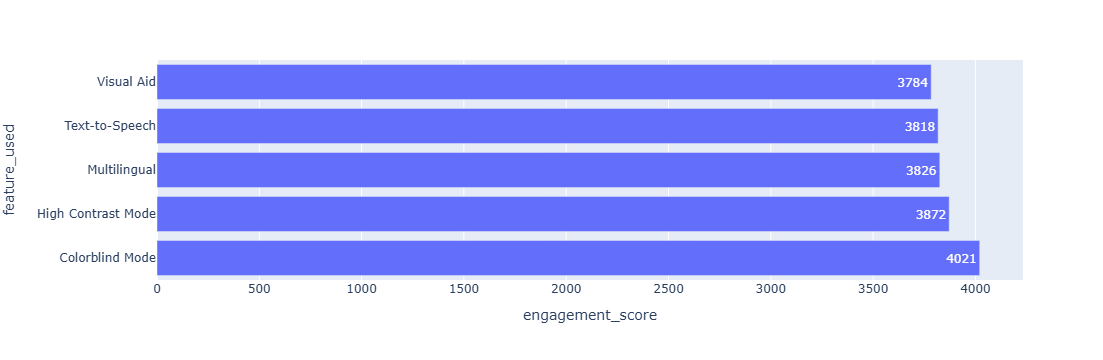

In [55]:
fig = px.bar(dataframe1,
             x='engagement_score',
             y='feature_used',
             text_auto=True)

fig.show()

In [56]:
gender_group = non_bi2.groupby(non_bi2['gender'])['engagement_score'].sum()
fd = pd.DataFrame(gender_group)
dataframe2 = fd.reset_index(level=0)
dataframe2

,gender,engagement_score
0,Female,3770
1,Male,3881
2,Non-Binary,3789


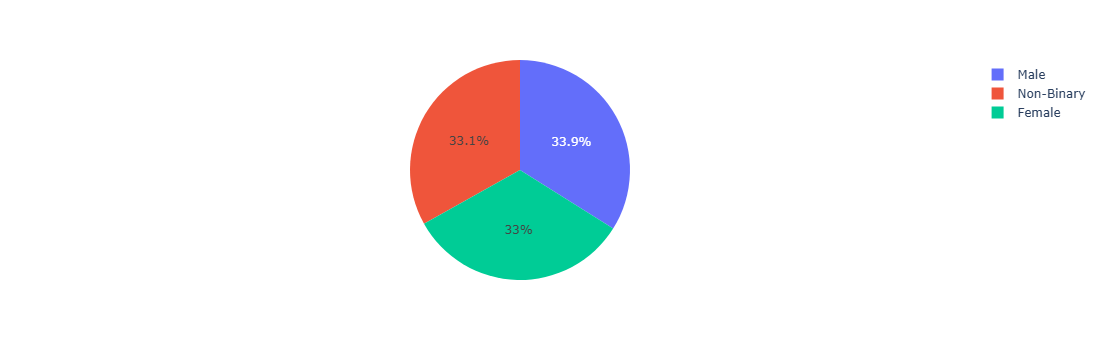

In [58]:
fig2 = px.pie(dataframe2,
              values='engagement_score',
              names='gender',
              )
fig2.show()

In [67]:
attributes_group = non_bi2.groupby(non_bi2['additional_attributes'])['engagement_score'].sum()
attributes_group
fd2 = pd.DataFrame(attributes_group)
dataframe3 = fd2.reset_index(level=0)
dataframe3

,additional_attributes,engagement_score
0,LGBTQ+,3921
1,Person of Color,3960
2,Straight,11440


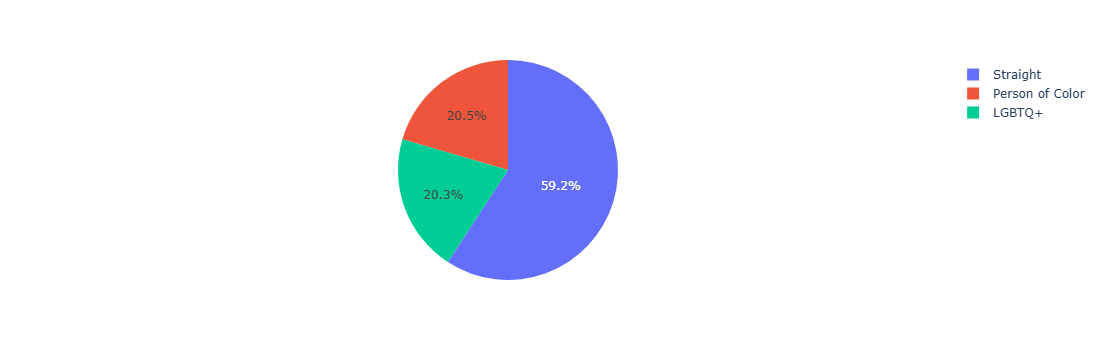

In [70]:
fig2 = px.pie(dataframe3,
              values='engagement_score',
              names='additional_attributes',
              )
fig2.show()